## Plotting Amphiboles on the Leake Calcic ampibole classification Diagram
- At present, we have only included the bottom figure from Leake et al. (1997) for the calcic amphiboles
- If you really need other diagrams, please reach out and we can maybe add some of the other ones!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## These amphiboles are from 2 units, unit 1 and unit 2

In [2]:
out=pt.import_excel('Amphibole_Liquids.xlsx', sheet_name="Amp_only_for_plotting")
my_input=out['my_input']
Amps=out['Amps']
Liqs=out['Liqs']

## Once we've loaded the data in, we can use the loc function to extract separate dataframes for unit 1 and unit2

In [3]:
Amps_Unit1=Amps.loc[Amps['Sample_ID_Amp']=="Unit1"]
Amps_Unit2=Amps.loc[Amps['Sample_ID_Amp']=="Unit2"]

## This function makes the plot automatically
- Here, we are plotting the amphiboles on Fig. 3 (bottom) from Leake, which is for Ca_B<1.5, and Na_A + K_A <0.5, CaA < 0.50
- The option "site_check=True" means that it only plots amphibles which fit these criteria, and the printed message tells you how many were excluded. If you want to plot ones outside this Ca_B and Na_A and K_A range anyway, select site_check=False. 
- This is not as customizable as the bottom option, where we show how to construct the plot yourself, but provides a good first look. 

0 amphiboles have Ca_B<1.5, so arent shown on this plot
0 amphiboles have Ca_A>=0.5, so arent shown on this plot
17 amphiboles have Na_A+K_A>0.5, so arent shown on this plot


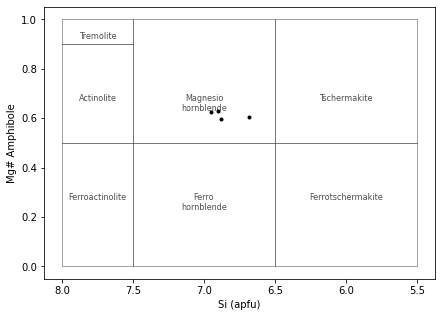

In [4]:
pt.plot_amp_class_Leake(amp_comps=Amps, fontsize=8, color=[0.3, 0.3, 0.3],
linewidth=0.5, lower_text=0.3, upper_text=0.7, text_labels=True, site_check=True,
plots="Ca_Amphiboles", marker='.k')

## Making a more customizable plot, e.g., plotting different units as different colours
- Here, we are plotting the amphiboles on Fig. 3a from Leake, which is for Ca_B<1.5, and Na_A + K_A <0.5
- By default, this code will plot all amphiboles, some of which may not actually lie on this diagram. 

(8.0, 5.5)

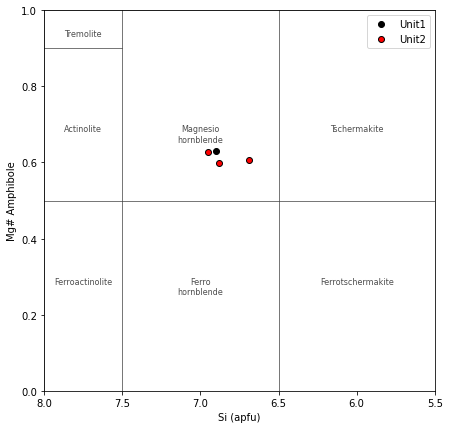

In [5]:
fig, (ax1) = plt.subplots(1, figsize=(7, 7), sharey=True)

# First, add the fields to your axis
pt.add_Leake_Amp_Fields_Fig3bot(ax1, fontsize=8, color=[0.3, 0.3, 0.3],
linewidth=0.5, lower_text=0.3, upper_text=0.7, text_labels=True)

# Now calculate the amphibole components
cat_23ox_Unit1=pt.calculate_Leake_Diagram_Class(amp_comps=Amps_Unit1)
cat_23ox_Unit2=pt.calculate_Leake_Diagram_Class(amp_comps=Amps_Unit2)

# You only want the ones where "Diagram" = Fig. 3 - bottom - LHS, Lets use Loc to find these rows
cat_23ox_Unit1_Correct=cat_23ox_Unit1.loc[cat_23ox_Unit1['Diagram']=="Fig. 3 - bottom - LHS"]
cat_23ox_Unit2_Correct=cat_23ox_Unit2.loc[cat_23ox_Unit2['Diagram']=="Fig. 3 - bottom - LHS"]

# Now add these components to the axis, you can change symbol size, plot multiple amphioble populations in different colors. 
ax1.plot(cat_23ox_Unit1_Correct['Si_Amp_cat_23ox'], cat_23ox_Unit1_Correct['Mgno_Amp'], 'ok', label='Unit1')
ax1.plot(cat_23ox_Unit2_Correct['Si_Amp_cat_23ox'], cat_23ox_Unit2_Correct['Mgno_Amp'], 'ok', mfc='red', label='Unit2')

# Now reverse the x axis to match the common way of showing this in the literature
ax1.invert_xaxis()

# Add the axes labels
ax1.set_ylabel('Mg# Amphibole')
ax1.set_xlabel('Si (apfu)')

# Add a legend
ax1.legend(loc='upper right')

# Adjust axis - Here, incorperate limit of diagram, but could trim to emphasize certain bits of data. 
ax1.set_ylim([0, 1])
ax1.set_xlim([8, 5.5])

In [8]:
cat_23ox_Unit1['Na_A']+cat_23ox_Unit1['K_A']

0     0.867711
1     0.966596
2     0.542867
3     0.578063
4     0.580779
5     0.668282
6     0.532469
7     0.423710
8     0.641712
9     0.915898
10    0.924725
11    0.942566
12    0.796429
dtype: float64

In [9]:
cat_23ox_Unit1['Ca_B']

0     1.758591
1     1.833945
2     1.682586
3     1.715030
4     1.677971
5     1.747143
6     1.810296
7     1.591369
8     1.727216
9     1.597284
10    1.675625
11    1.657272
12    1.769866
Name: Ca_B, dtype: float64

In [12]:
Leake_Sites=cat_23ox_Unit1
High_Ca_B=Leake_Sites['Ca_B']>=1.5
High_NaK_A=(Leake_Sites['Na_A']+Leake_Sites['K_A'])>=0.5
low_TiC=(Leake_Sites['Ti_C'])<0.5
low_CaA=(Leake_Sites['Ca_A'])<0.5
Fig3b_LHS=( (High_Ca_B) & (~High_NaK_A)  & (low_CaA) )